In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../12.1 DATA/train (3).csv',usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [13]:
# Here as 5% missing data in GarageQual we can apply frequent value(Mode) imputation

Text(0, 0.5, 'Number of houses')

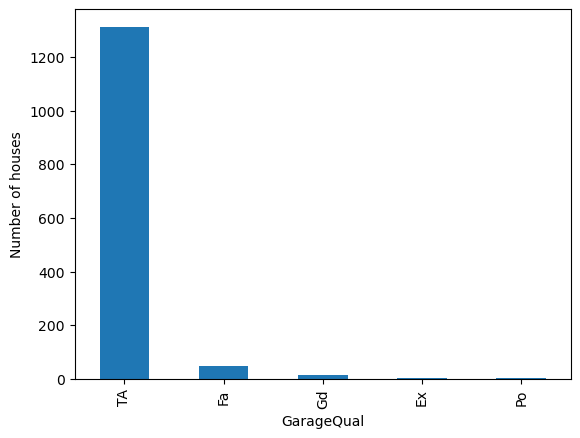

In [5]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

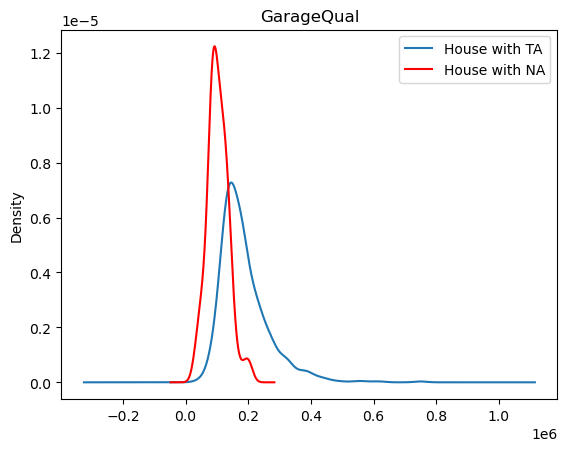

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels, = ax.get_legend_handles_labels()
labels = ['House with TA','House with NA']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual') 

In [ ]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [10]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: xlabel='GarageQual'>

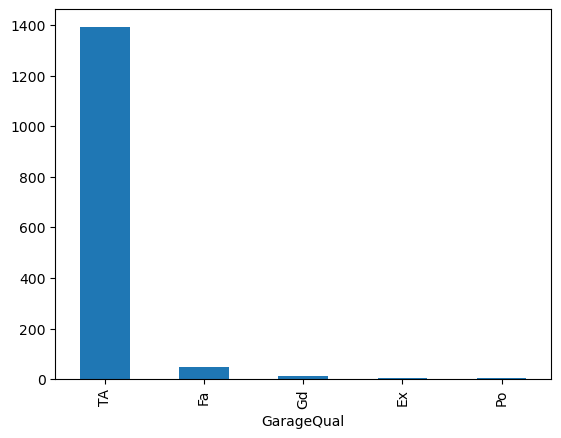

In [11]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

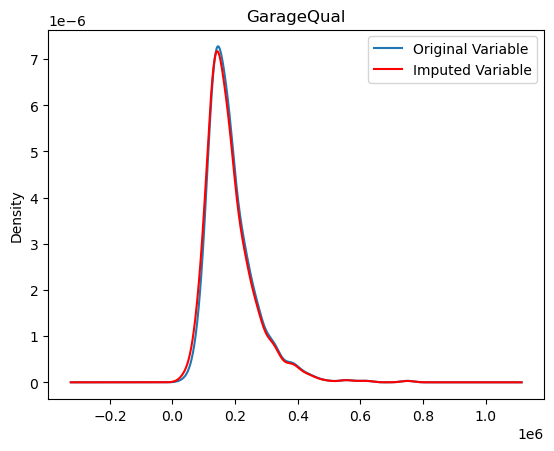

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

# Distribuation of the variable after impuattion
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels, = ax.get_legend_handles_labels()
labels = ['Original Variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual') 

In [14]:
# Now lets apply same imputation on FirePlaceQual which have more than 10% missing values

Text(0, 0.5, 'Number of houses')

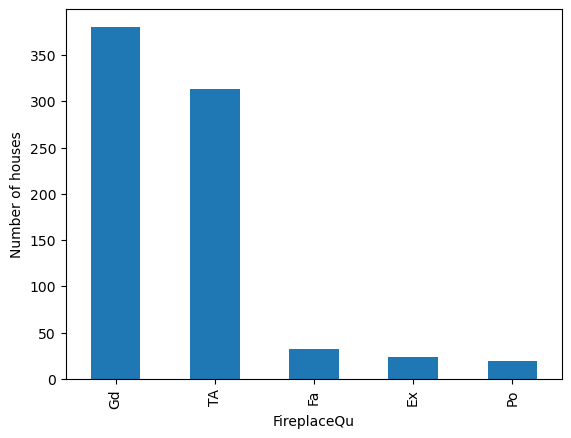

In [17]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [18]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

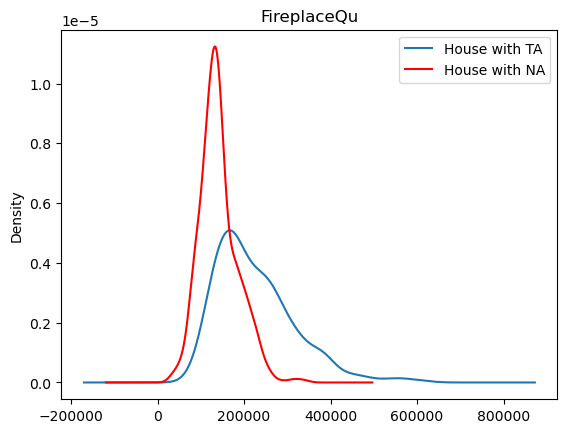

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels, = ax.get_legend_handles_labels()
labels = ['House with TA','House with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu') 

In [20]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [21]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

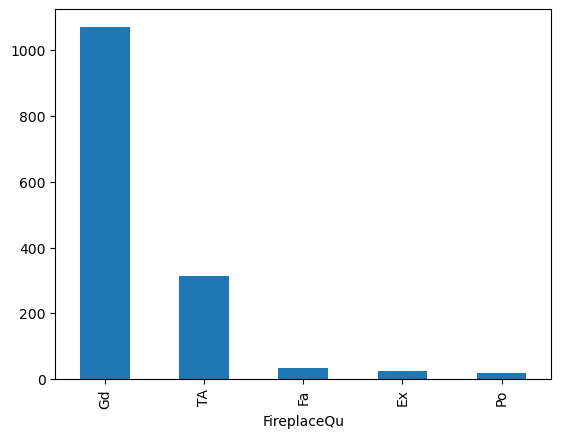

In [22]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

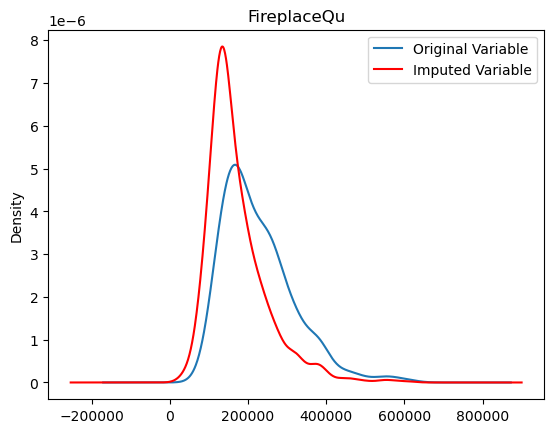

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

# Distribuation of the variable after impuattion
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels, = ax.get_legend_handles_labels()
labels = ['Original Variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu') 

In [24]:
# There are still difference
# Didn't give best result using frequent value imputation for greater than 10% missing value

### Using Sklearn Library

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [26]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [27]:
si = SimpleImputer(strategy='most_frequent')

In [28]:
x_train = si.fit_transform(x_train)
x_test = si.transform(x_test)

In [29]:
si.statistics_

array(['Gd', 'TA'], dtype=object)